In [1]:
#!pip install plotly

In [2]:
import pandas as pd
import pandas as pd
import numpy as np
import os
from matplotlib import pyplot as plt 
from statsmodels.tsa.seasonal import seasonal_decompose
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.ar_model import AR

## Import the file here
Change the dataset name Seattles.csv to your city name and run all

In [3]:
seattle_df = pd.read_csv("Seattlets.csv")

In [4]:
seattle_df.head()

ds   Price
0  01/04/08  352040
1  01/05/08  349925
2  01/06/08  348199
3  01/07/08  344527
4  01/08/08  342206

In [5]:
import plotly.express as px

fig = px.line(seattle_df, x='ds', y="Price")
fig.show()

In [6]:
#pd.to_datetime('13000101', format='%Y%m%d', errors='ignore')
seattle_df.ds= pd.to_datetime(seattle_df.ds,format = '%d/%m/%y')

In [7]:
seattle_df.set_index('ds',inplace = True)

In [8]:
df2 = seattle_df 

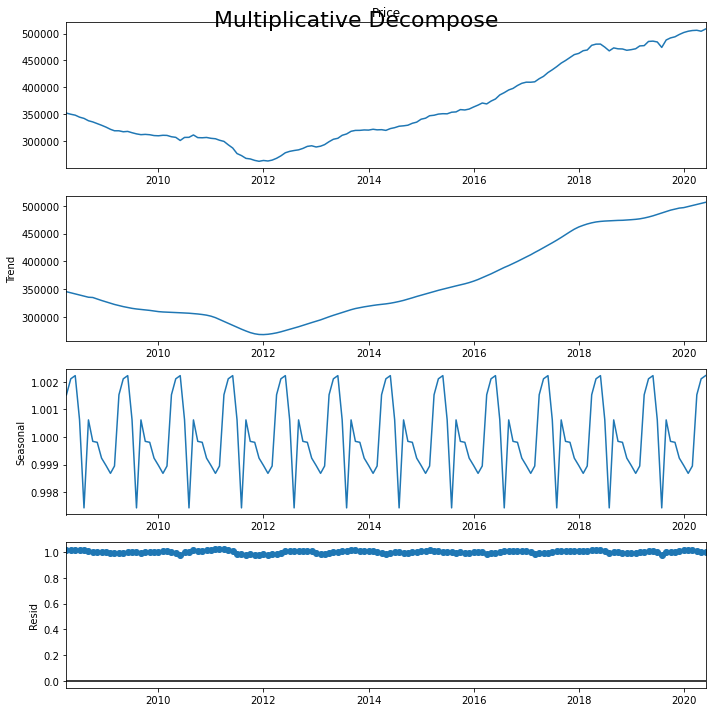

In [9]:
# Multiplicative Decomposition
result_mul = seasonal_decompose(df2['Price'] + 0.1, model= 'multiplicative', extrapolate_trend= 'freq')
plt.rcParams.update({'figure.figsize': (10,10)}) 
result_mul.plot().suptitle('Multiplicative Decompose', fontsize=22) 
plt.show()

In [10]:
result = result_mul

In [11]:
series = df2['Price']

/Users/shainan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




Test for seasonal MSE: 1.4823670588421984e-13


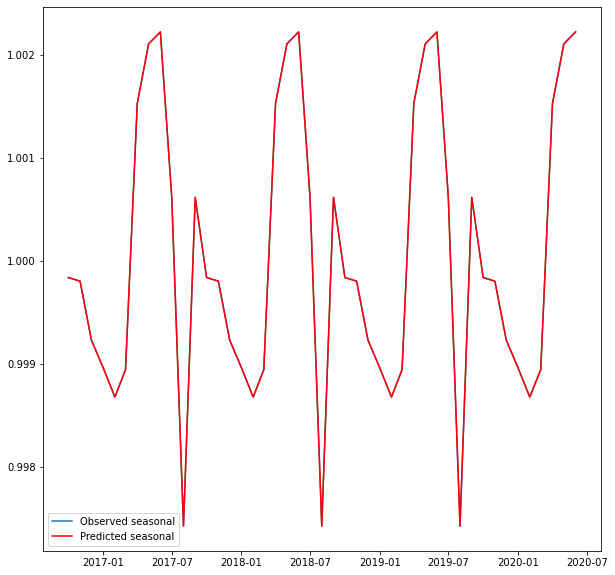

/Users/shainan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




Test for trend MSE: 404.3632219801113


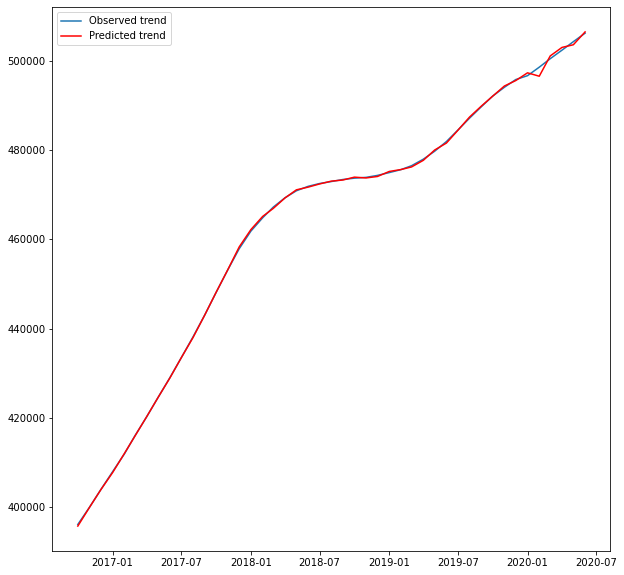

/Users/shainan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




Test for residual MSE: 0.007664105761054894


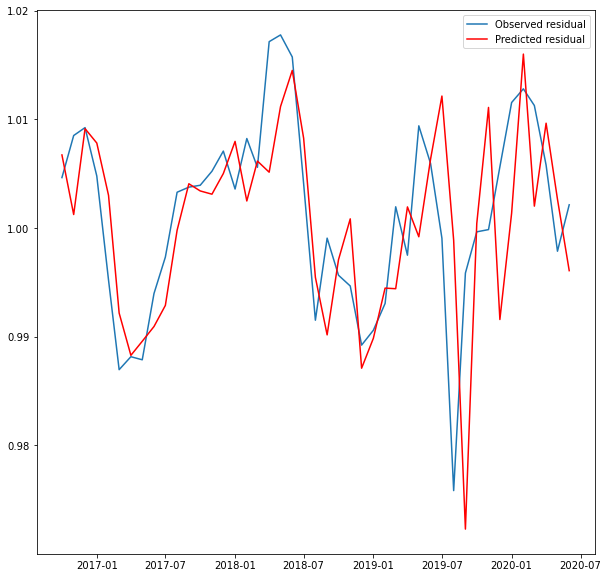

In [12]:
component_dict = {'seasonal': result.seasonal, 'trend': result.trend, 'residual': result.resid}
prediction_results = []

for component in ['seasonal', 'trend', 'residual']:
    historic = component_dict[component].iloc[:int(len(series) * 0.7)].to_list()
    test = component_dict[component].iloc[int(len(series) * 0.7):]
    predictions = []
    for i in range(len(test)):
        model = AR(historic)
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index, name=component)
    prediction_results.append(predictions)
    test_score = np.sqrt(mean_squared_error(test, predictions))
    print(f'Test for {component} MSE: {test_score}')

    # plot results
    plt.plot(test.iloc[:], label='Observed '+component)
    plt.plot(predictions.iloc[:], color='red', label='Predicted '+component)
    plt.legend()
    plt.show()

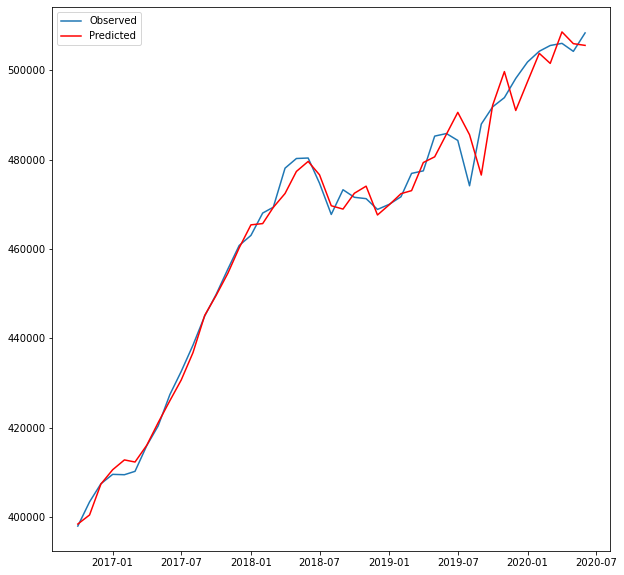

RMSE: 3661.621160267205


In [13]:
recomposed_preds = pd.concat(prediction_results,axis=1).prod(axis = 1)
recomposed_preds.name = 'recomposed_preds'
plt.plot(series.iloc[int(len(series) * 0.7):], label='Observed')
plt.plot(recomposed_preds, color='red', label='Predicted')
plt.legend()
plt.show()
test_score = np.sqrt(mean_squared_error(series.iloc[int(len(series) * 0.7):], recomposed_preds))
print(f'RMSE: {test_score}')

In [14]:
y_pred = recomposed_preds

In [15]:
y_true = series.iloc[int(len(series) * 0.7):]

In [16]:
MAPE = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [17]:
MAPE

0.5370889593293952

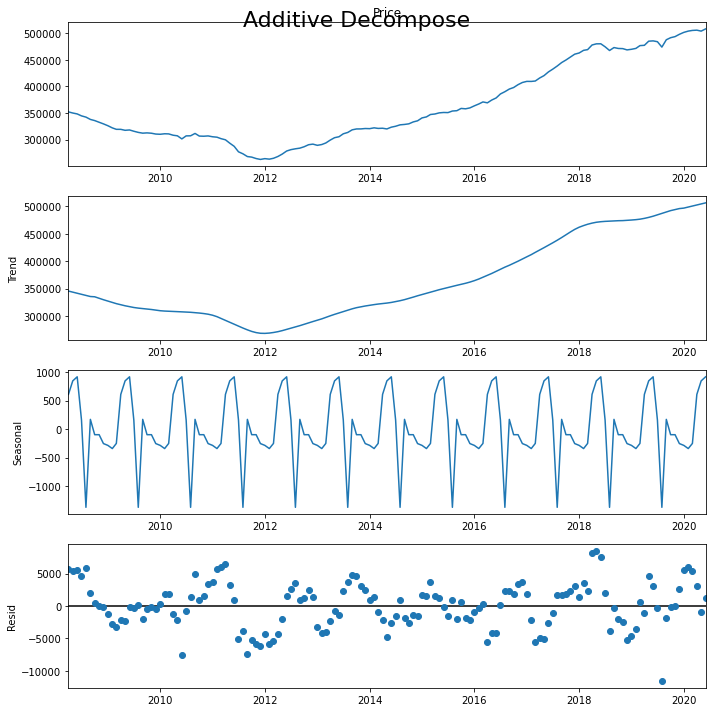

In [18]:
# Additive Decomposition
result_add = seasonal_decompose(df2['Price'], model= 'additive', extrapolate_trend='freq')
# Plot
plt.rcParams.update({'figure.figsize': (10,10)}) 
result_add.plot().suptitle('Additive Decompose', fontsize=22) 
plt.show()

In [19]:
result = result_add

/Users/shainan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




Test for seasonal MSE: 6.115659483965592e-13


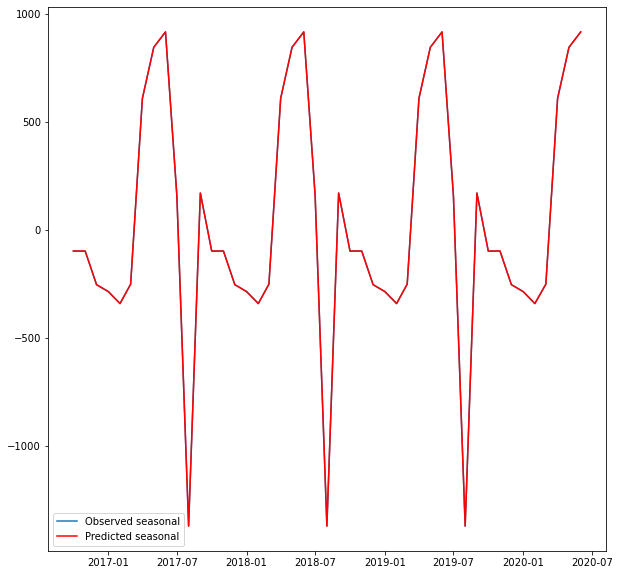

/Users/shainan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




Test for trend MSE: 404.36322201290466


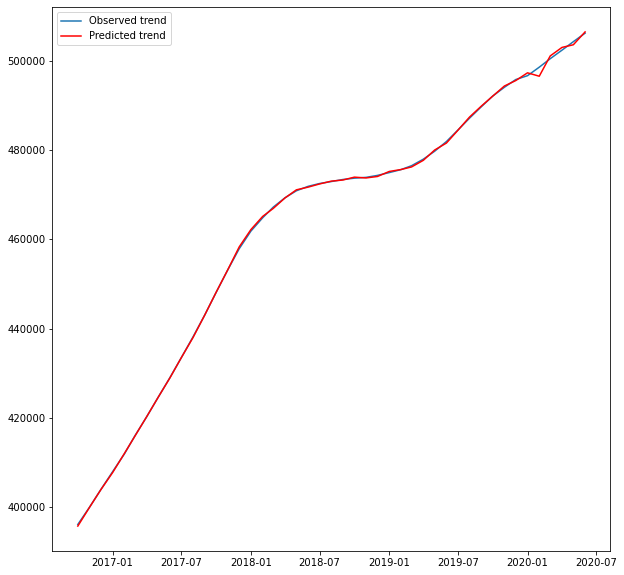

/Users/shainan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)




Test for residual MSE: 3579.1169358405864


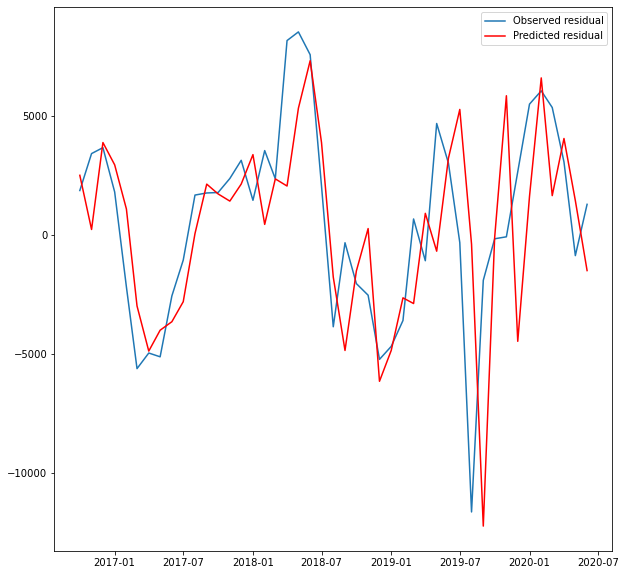

In [20]:
component_dict = {'seasonal': result.seasonal, 'trend': result.trend, 'residual': result.resid}
prediction_results = []

for component in ['seasonal', 'trend', 'residual']:
    historic = component_dict[component].iloc[:int(len(series) * 0.7)].to_list()
    test = component_dict[component].iloc[int(len(series) * 0.7):]
    predictions = []
    for i in range(len(test)):
        model = AR(historic)
        model_fit = model.fit()
        pred = model_fit.predict(start=len(historic), end=len(historic), dynamic=False)
        predictions.append(pred[0])
        historic.append(test[i])
    predictions = pd.Series(predictions, index=test.index, name=component)
    prediction_results.append(predictions)
    test_score = np.sqrt(mean_squared_error(test, predictions))
    print(f'Test for {component} MSE: {test_score}')
    # plot results
    plt.plot(test.iloc[:], label='Observed '+component)
    plt.plot(predictions.iloc[:], color='red', label='Predicted '+component)
    plt.legend()
    plt.show()

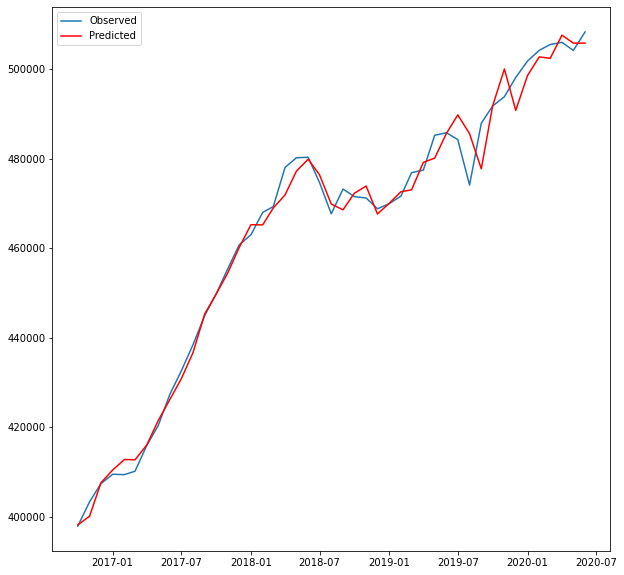

RMSE: 3570.7793513683505


In [21]:

recomposed_preds = pd.concat(prediction_results,axis=1).sum(axis=1)
recomposed_preds.name = 'recomposed_preds'
plt.plot(series.iloc[int(len(series) * 0.7):], label='Observed')
plt.plot(recomposed_preds, color='red', label='Predicted')
plt.legend()
plt.show()
test_score = np.sqrt(mean_squared_error(series.iloc[int(len(series) * 0.7):], recomposed_preds))
print(f'RMSE: {test_score}')

In [22]:
y_pred = recomposed_preds

In [23]:
y_true = series.iloc[int(len(series) * 0.7):]

In [24]:
MAPE = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [25]:
MAPE

0.5295142397392881

### Build the AR Model

In [27]:
x = df2
for i in range(0,18):
    model = AR(x)
    model_fit = model.fit()
    predictions =model_fit.predict(start=len(x), end=len(x))
    predictions_df = pd.DataFrame(predictions,columns = ['Price'])
    x = x.append(predictions_df)

/Users/shainan/opt/anaconda3/lib/python3.8/site-packages/statsmodels/tsa/ar_model.py:691: FutureWarning:


statsmodels.tsa.AR has been deprecated in favor of statsmodels.tsa.AutoReg and
statsmodels.tsa.SARIMAX.

AutoReg adds the ability to specify exogenous variables, include time trends,
and add seasonal dummies. The AutoReg API differs from AR since the model is
treated as immutable, and so the entire specification including the lag
length must be specified when creating the model. This change is too
substantial to incorporate into the existing AR api. The function
ar_select_order performs lag length selection for AutoReg models.

AutoReg only estimates parameters using conditional MLE (OLS). Use SARIMAX to
estimate ARX and related models using full MLE via the Kalman Filter.

To silence this warning and continue using AR until it is removed, use:

import warnings
warnings.filterwarnings('ignore', 'statsmodels.tsa.ar_model.AR', FutureWarning)


/Users/shainan/opt/anaconda3/lib/python

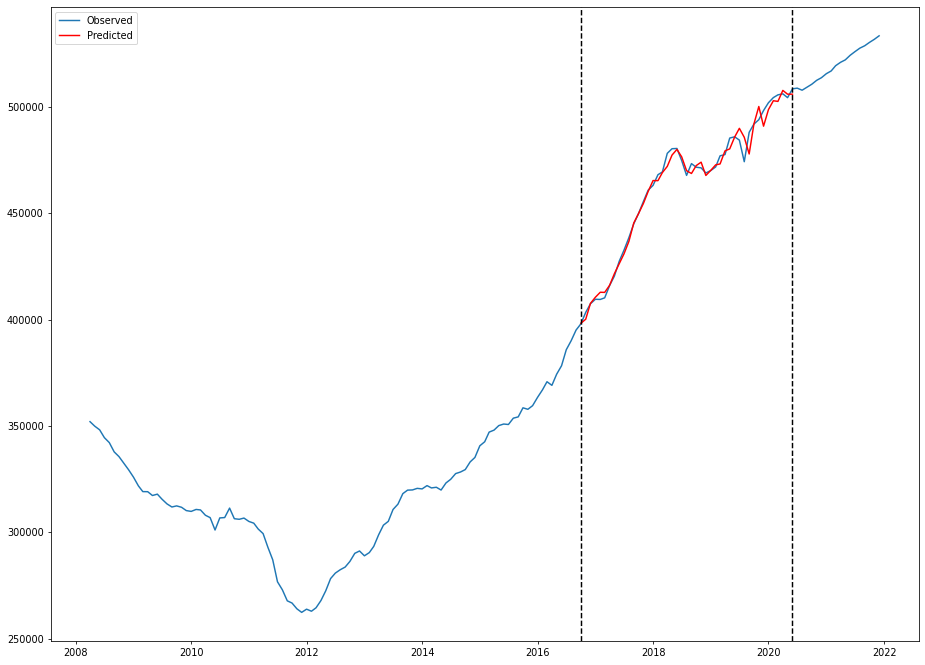

In [28]:
plt.figure(figsize=(16, 12), dpi=70)
plt.plot(x, label='Observed')
plt.plot(recomposed_preds, color='red', label='Predicted')
plt.legend()
plt.axvline(x = '2020-06-01',color = 'black',linestyle='--')
plt.axvline(x = '2016-10-01',color = 'black',linestyle='--')
plt.show()

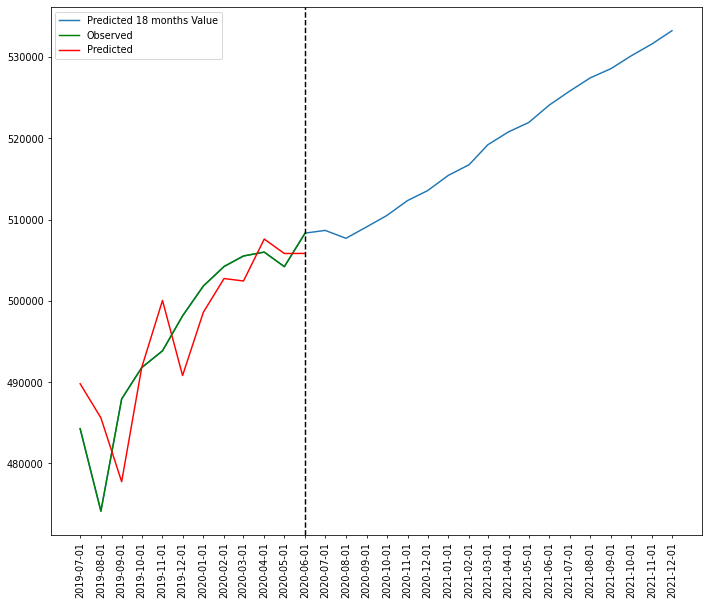

In [33]:
x_date = np.arange('2019-07-01',"2022-01-01",dtype = "datetime64[M]")
plt.figure(figsize=(12, 10), dpi=70)
plt.plot(x[len(x)-30:], label='Predicted 18 months Value')
plt.plot(x[len(x)-30:len(x)-18], label='Observed',color = 'green')
plt.plot(recomposed_preds[len(recomposed_preds)-12:], color='red', label='Predicted')
plt.legend()
plt.axvline(x = '2020-06-01',color = 'black',linestyle='--')
plt.xticks(x_date,rotation=90)
plt.show()

In [44]:
y_pred = recomposed_preds[len(recomposed_preds)-12:]

In [47]:
y_true = x[len(x)-30:len(x)-18].Price

In [49]:
MAPE_test = np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [50]:
MAPE_test

0.9217573243582009